### Tarea 1 - Simulación

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import gamma

#### Cargar datos

In [2]:
ruta = './consumo_hamb.csv'
data_frame = pd.read_csv(ruta, header=None, names=['Consumo (kg)'])
data_frame

,Consumo (kg)
0,490.40
1,708.02
2,559.67
3,605.58
4,529.02
...,...
249,514.96
250,794.97
251,634.73
252,514.59


#### Análisis Exploratorio

In [3]:
descriptivos = data_frame.describe()
descriptivos.loc['Asimetria'] = data_frame['Consumo (kg)'].skew()
descriptivos.loc['Curtosis'] = data_frame['Consumo (kg)'].kurt()
descriptivos

,Consumo (kg)
count,254.000000
mean,588.762283
std,105.002327
min,300.480000
25%,519.870000
50%,597.280000
75%,659.220000
max,865.790000
Asimetria,-0.144406
Curtosis,-0.372586


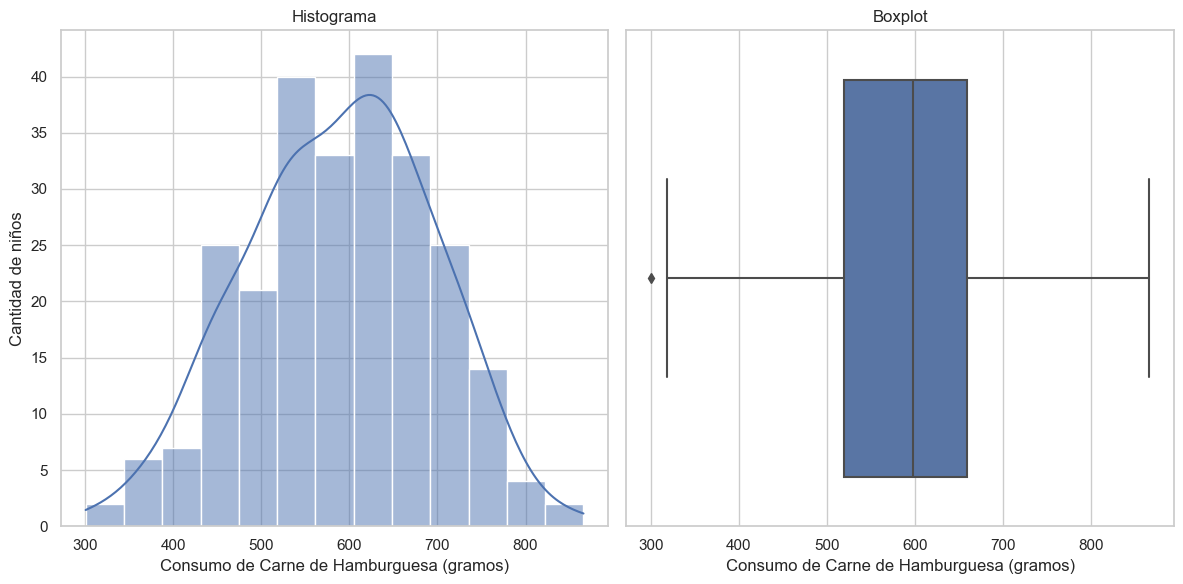

In [4]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_ylabel('Cantidad de niños')
sns.histplot(data_frame['Consumo (kg)'], kde=True, ax=ax[0])
ax[0].set_xlabel('Consumo de Carne de Hamburguesa (gramos)')
ax[0].set_title('Histograma')
sns.boxplot(x=data_frame['Consumo (kg)'], ax=ax[1])
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Consumo de Carne de Hamburguesa (gramos)')


plt.tight_layout()
plt.show()

#### Hallazgos

Cuando se realiza el histograma de los datos, se puede ver siguen aparenetemente una distribución normal. Realizando los calculos de la asimetría, se puede ver que es negativa, es decir los datos estan ubicados más a la derecha de la campana de Gauss. La curtosis es negativa lo que indica que las colas son mas largas de las de una distriubción normal estandar. Esto se puede evidenciar en debido a un par de datos atipicos cercanos a 300 y otros superiores a 800. En el gráfico de caja se ve una mediana cerca a los 600 y una distribución en los cuantiles casi simetrica pero con una mayor concentración de datos hacia abajo de la mediana. 

--------------------------------------------- 

## Modelo con distribución normal

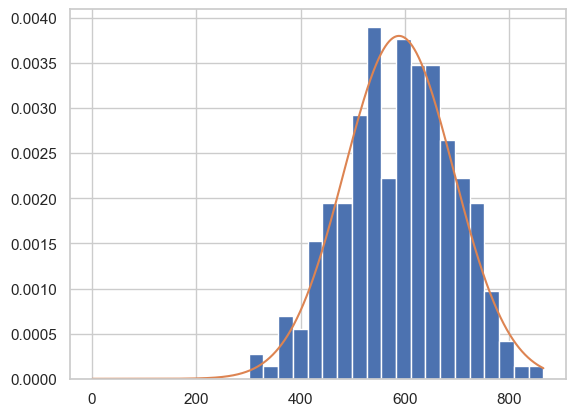

In [5]:
mean =data_frame['Consumo (kg)'].mean()
std = data_frame['Consumo (kg)'].std()
max = data_frame['Consumo (kg)'].max()

plt.hist(data_frame['Consumo (kg)'], bins=20, density=True)

x= np.arange(1,max,0.001)
plt.plot(x, stats.norm.pdf(x,loc=mean,scale=std))

plt.show()

Error Cuadratico Medio
$\sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2}$

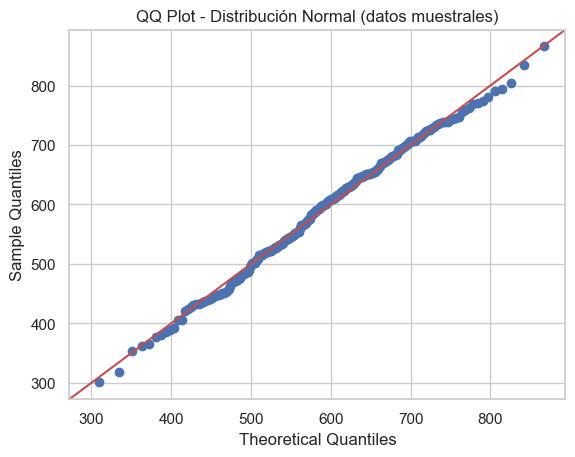

Error cuadratico medio: 6.876160685814148


In [6]:
qqplot = sm.qqplot(data = data_frame['Consumo (kg)'], dist=stats.norm, loc=mean, scale=std, line="45")
plt.title('QQ Plot - Distribución Normal (datos muestrales)')
plt.show()

#Calculando valores
cuantiles_observados = qqplot.axes[0].lines[0].get_xdata()
cuantiles_teoricos = qqplot.axes[0].lines[0].get_ydata()

#Calculando error
tuplas_cuantiles = list(zip(cuantiles_teoricos, cuantiles_observados))
suma_cuadrados = sum((x - y) ** 2 for x, y in tuplas_cuantiles)

error = suma_cuadrados / len(data_frame['Consumo (kg)'])
RMSE_norm_df = math.sqrt(error)

print(f'Error cuadratico medio: {RMSE_norm_df}')

--------------------------------------------- 

## Modelo con distribución Gamma

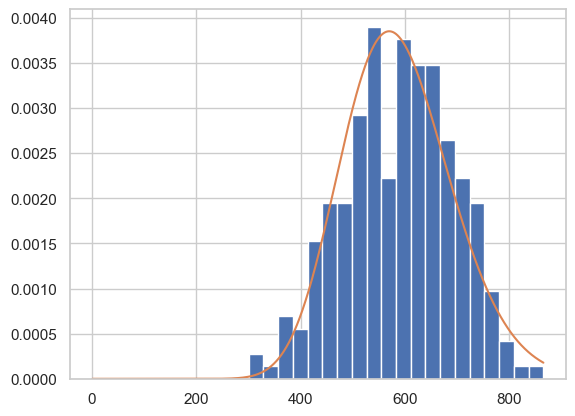

In [7]:
alpha = mean**2/std**2
beta = mean/std**2

plt.hist(data_frame['Consumo (kg)'], bins=20, density=True)

x= np.arange(1,max,0.001)
plt.plot(x, stats.gamma.pdf(x,alpha, scale= 1 / beta,))

plt.show()

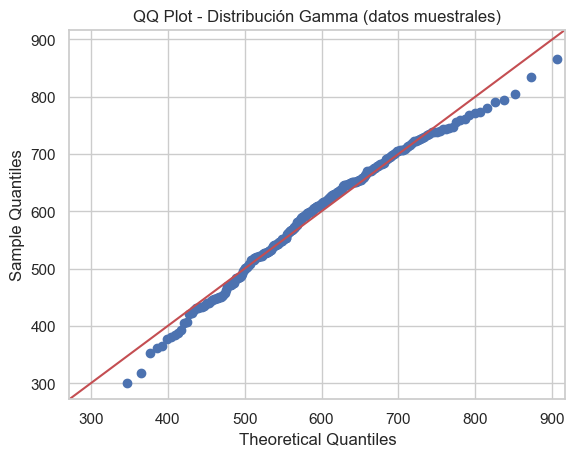

Error cuadratico medio: 13.279635030634601


In [8]:

qqplot = sm.qqplot(data = data_frame['Consumo (kg)'], dist = stats.gamma, distargs =(alpha, ), scale= 1 / beta, line ="45")
plt.title('QQ Plot - Distribución Gamma (datos muestrales)')
plt.show()

#Calculando valores
cuantiles_observados = qqplot.axes[0].lines[0].get_xdata()
cuantiles_teoricos = qqplot.axes[0].lines[0].get_ydata()

#Calculando error
tuplas_cuantiles = list(zip(cuantiles_teoricos, cuantiles_observados))
suma_cuadrados = sum((x - y) ** 2 for x, y in tuplas_cuantiles)

error = suma_cuadrados / len(data_frame['Consumo (kg)'])
RMSE_gamma_df = math.sqrt(error)

print(f'Error cuadratico medio: {RMSE_gamma_df}')

------------------------------


### Errores


In [9]:
errores = {'ECM Normal': RMSE_norm_df , 'ECM Gamma': RMSE_gamma_df}
errores

{'ECM Normal': 6.876160685814148, 'ECM Gamma': 13.279635030634601}

## Hallazgos

Si bien los QQ plots para las distribuciones parecen ajustarse. Se puede ver que para la distribución normal hay más puntos que coinciden con la linea de referencia al comparar los cuantiles teoricos y reales. En ambos casos, las colas tienen valores mas altos y mas bajos de las esperadas, no se ajusta perfectamente a la distribución pero se acercan bastante. 
Para tomar una decisión basada en datos, seleccionaremos la distribución cuyo Error Cuadrático Medio sea el menor, siendo efectivamente la distribución Normal, tal como lo hemos intuido gráficamente.